# Introduction

  Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.

  In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

DATASET [CLICK HERE](https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input)

### 1. Importing the Required Libraries

In this step, we import the necessary libraries for our data analysis and machine learning tasks. We use pandas for data manipulation, seaborn and matplotlib for data visualization, train_test_split from sklearn.model_selection to split our data into training and testing sets, StandardScaler from sklearn.preprocessing for feature scaling, LinearRegression from sklearn.linear_model for building a linear regression model, and mean_squared_error and r2_score from sklearn.metrics to evaluate our model.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Load and View the Dataset

In this step, we load the dataset from a CSV file named 'advertising.csv' into a pandas DataFrame called df. We then display the first few rows of the DataFrame using the head() method to get an initial glimpse of the data.

In [2]:
# Load the dataset
df = pd.read_csv('advertising.csv')

# Display the first few rows
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


The table above shows a snippet of a dataset with four columns: "TV", "Radio", "Newspaper", and "Sales". Each row represents a different entry in the dataset, with values indicating the amount spent on advertising through different channels (TV, Radio, Newspaper) and the corresponding sales generated. For example, the first row indicates that $230.1 was spent on TV advertising, $37.8 on Radio, $69.2 on Newspaper, and this resulted in sales of 22.1 units.

## 3. Checking Datatypes and Missing Values in Dataframe

In this step, we check the data types of each column in the DataFrame using the info() method. This provides us with information about the column data types and the number of non-null values in each column.

Next, we use the isnull() method to check for missing values in the DataFrame, followed by the sum() method to calculate the total number of missing values in each column. This helps us identify if there are any missing values that need to be addressed before further analysis.

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The output from df.info() provides the following information about the DataFrame:

- RangeIndex: This indicates that the DataFrame has 200 entries, numbered from 0 to 199, representing the number of rows in the DataFrame.

- Data columns: This section lists the names of the columns in the DataFrame along with two additional pieces of information:

- Non-Null Count: This indicates the number of non-null (non-missing) values present in each column. In this case, all columns have 200 non-null values, which means there are no missing values in the DataFrame.

- Dtype: This indicates the data type of the values in each column. All columns in this DataFrame have a data type of float64, which means they contain floating-point numbers.

- Memory Usage: This indicates the amount of memory (in kilobytes) used by the DataFrame to store the data. In this case, the DataFrame uses 6.4 KB of memory.

Overall, this information gives a summary of the structure of the DataFrame, including the number of entries, the columns present, the presence of missing values, and the data types of the columns.

In [4]:
# Check for missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

The output 0 for all columns (TV, Radio, Newspaper, Sales) indicates that there are no missing values (null values) in any of these columns. The df.isnull().sum() method calculates the number of missing values for each column in the DataFrame (df). Since all columns have a count of 0, it means there are no missing values in the DataFrame for any of these columns.

## 4. EDA (Exploratory Data Analysis)

 Exploratory Data Analysis is a crucial step in data analysis that involves exploring and summarizing the main characteristics of a dataset. This process helps in understanding the data, identifying patterns, and checking assumptions before applying more complex statistical analyses.

### 4.1 Univariate Analysis

In univariate analysis, we explore each variable individually to understand its distribution and characteristics. Here, we perform univariate analysis on the dataset using summary statistics and histograms.

#### Summary Statistics:
The `describe()` method provides summary statistics for numerical columns, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values. These statistics give us an overview of the central tendency, dispersion, and shape of the distribution for each numerical feature.

#### Histograms:
Histograms are used to visualize the distribution of numerical data. We plot histograms for all numerical features (`TV`, `Radio`, `Newspaper`, and `Sales`) using `df.hist()`. The `bins` parameter controls the number of bins or intervals in the histogram, and `figsize` adjusts the size of the plot.

Additionally, we create a separate histogram for the target variable `Sales` using `sns.histplot()` from the Seaborn library. Setting `kde=True` adds a kernel density estimate to the plot, providing a smoothed representation of the distribution.

These visualizations help us understand the distribution and spread of values in each feature, as well as the distribution of the target variable, which is essential for further analysis and modeling.

In [5]:
# Summary statistics for numerical columns
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


This table provides summary statistics for the numerical columns in the dataset:

- **count**: The number of non-null observations in each column. For example, there are 200 observations for each of the columns (`TV`, `Radio`, `Newspaper`, `Sales`), indicating that there are no missing values in the dataset.

- **mean**: The average value of each column. For instance, the average amount spent on TV advertising is approximately 147.04 units, while the average sales generated is approximately 15.13 units.

- **std**: The standard deviation, which measures the dispersion of values around the mean. It indicates the amount of variation or spread in the data. For example, the standard deviation for the `TV` column is approximately 85.85, indicating a relatively large spread in the amount spent on TV advertising.

- **min**: The minimum value in each column. This represents the smallest value observed in the dataset. For instance, the minimum amount spent on TV advertising is 0.7 units, and the minimum sales generated is 1.6 units.

- **25%**, **50%**, **75%**: These values represent the quartiles of the data. The 25th percentile (Q1) is the value below which 25% of the data falls, the 50th percentile (Q2 or median) is the value below which 50% of the data falls, and the 75th percentile (Q3) is the value below which 75% of the data falls. These values provide insights into the distribution of the data and can help identify outliers.

- **max**: The maximum value in each column, representing the largest value observed in the dataset. For example, the maximum amount spent on TV advertising is 296.4 units, and the maximum sales generated is 27 units.

These summary statistics help to understand the central tendency, spread, and distribution of the numerical variables in the dataset.

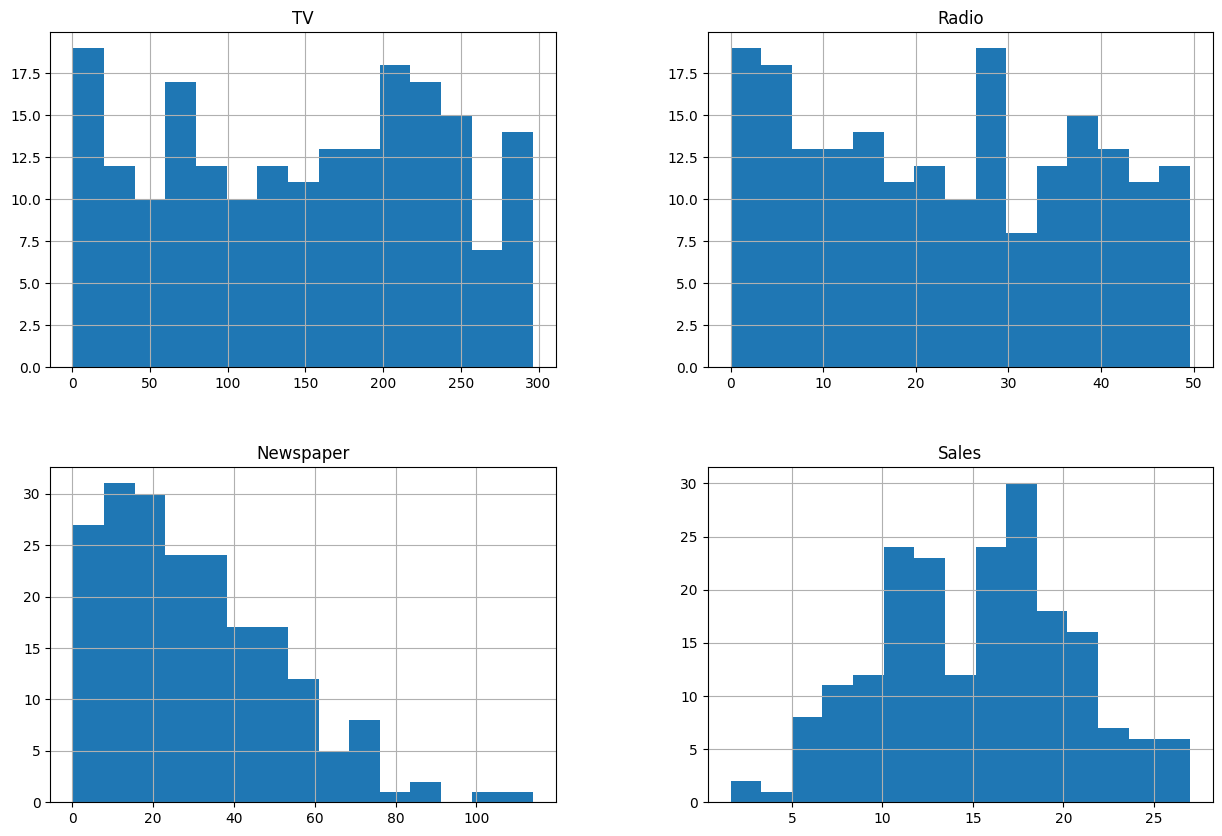

In [6]:
# Histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.show()

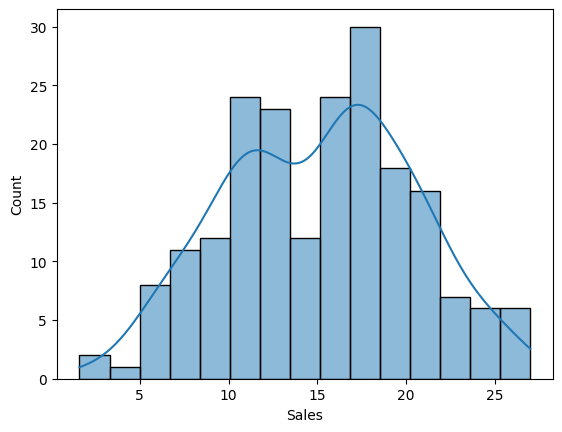

In [7]:
# Histogram for the target variable
sns.histplot(df['Sales'], bins=15, kde=True)
plt.show()

### 4.2 Bivariate Analysis

Bivariate analysis involves analyzing the relationship between pairs of variables in a dataset. Here, we focus on the relationship between variables using a correlation heatmap.

#### Correlation Heatmap:
A correlation heatmap is a visual representation of the correlation matrix, which shows the correlation coefficients between pairs of variables. The correlation coefficient ranges from -1 to 1, where:

- Values close to 1 indicate a strong positive correlation (as one variable increases, the other also increases).

- Values close to -1 indicate a strong negative correlation (as one variable increases, the other decreases).

- Values close to 0 indicate no correlation.

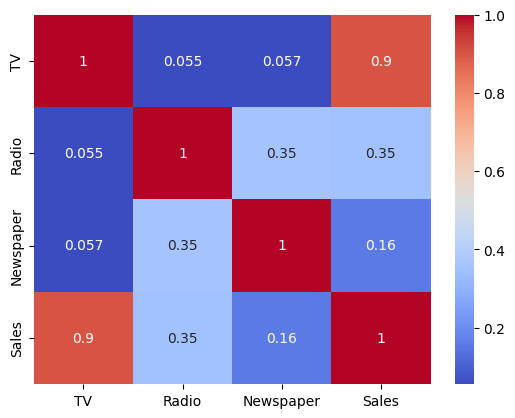

In [8]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## 5. Preprocessing the Data

Preprocessing the data is an essential step in data preparation before building machine learning models. It involves transforming the raw data into a format that is suitable for analysis and modeling. Common preprocessing steps include handling missing values, encoding categorical variables, and scaling numerical features.

#### Explanation of the Code:
1. **Identify Numerical Features**: We first identify the numerical features in the dataset. This step is necessary because some preprocessing techniques, such as scaling, are only applied to numerical features. We use `df.columns[:-1]` to select all columns except the last one, which is assumed to be the target variable (`Sales`).

2. **Initialize the Scaler**: We initialize a `StandardScaler` object. The `StandardScaler` is used to scale (standardize) numerical features by removing the mean and scaling to unit variance. This step ensures that all features have the same scale, which is important for many machine learning algorithms.

3. **Scale the Numerical Features**: We apply the scaler to the selected numerical features (`df[numerical_features]`) using the `fit_transform()` method. This method computes the mean and standard deviation of each feature and then scales the features according to the formula `(x - mean) / std`, where `x` is the original value, `mean` is the mean of the feature, and `std` is the standard deviation of the feature.

Overall, this preprocessing step ensures that the numerical features are on the same scale, which can improve the performance of machine learning models, especially those that are sensitive to the scale of the features (e.g., linear regression, KNN).

In [9]:
# Identify numerical features
numerical_features = df.columns[:-1]

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## 6. Train-Test Split

In machine learning, it's important to split the dataset into two subsets: one for training the model and another for testing its performance. This is done to evaluate the model's performance on unseen data and avoid overfitting.

#### Training Data:
- **X_train**: This contains the features (inputs) for training the model.
- **y_train**: This contains the target variable (output) for training the model.

#### Testing Data:
- **X_test**: This contains the features (inputs) for evaluating the trained model.
- **y_test**: This contains the target variable (output) for evaluating the trained model.

#### Explanation of the Code:
1. **Define Features and Target**: We separate the dataset into features (`X`) and the target variable (`y`). The features are all columns except for the target variable (`Sales`), which is assigned to `y`.

2. **Split the Data**: We use the `train_test_split()` function from `sklearn.model_selection` to split the dataset into training and testing sets.
   - `test_size=0.2` specifies that 20% of the data should be used for testing, and the remaining 80% for training.
   - `random_state=42` sets the random seed for reproducibility, ensuring that the split is the same each time the code is run.

This splitting strategy allows us to train the model on one subset of the data and evaluate its performance on another subset, providing an estimate of how well the model generalizes to new, unseen data.

In [10]:
# Define features (X) and target (y)
X = df.drop(columns=['Sales'])
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Build and Evaluate a Machine Learning Model

In this section, we build a machine learning model using linear regression and evaluate its performance on the test set.

#### Steps:

1. **Initialize the Model**: We create an instance of the `LinearRegression` model, which will be used to fit the training data and make predictions.

2. **Train the Model**: We use the `fit()` method to train the model on the training data (`X_train`, `y_train`). This step involves finding the coefficients that best fit the training data.

3. **Make Predictions**: We use the trained model to make predictions on the test data (`X_test`). The `predict()` method is used to generate predicted values (`y_pred`) for the target variable.

4. **Evaluate the Model**:
   - **Mean Squared Error (MSE)**: This metric measures the average squared difference between the actual and predicted values. A lower MSE indicates a better fit of the model to the data.
   - **R-squared (R2)**: This metric indicates the proportion of the variance in the target variable that is predictable from the features. It ranges from 0 to 1, with higher values indicating a better fit.

5. **Visualize Predictions**: We create a scatter plot to visualize the predicted sales (`y_pred`) against the actual sales (`y_test`). The diagonal dashed line represents a perfect prediction, where the predicted and actual values are equal.

This process gives us insights into how well the model is performing and helps us understand the relationship between the features and the target variable.

In [11]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 2.907756910271093
R-squared: 0.9059011844150825


The Mean Squared Error (MSE) and R-squared values are metrics used to evaluate the performance of a regression model, such as linear regression.

- **Mean Squared Error (MSE)**:
  - The MSE measures the average squared difference between the actual and predicted values.
  - In this case, the MSE is approximately 2.91. This means, on average, the squared difference between the actual and predicted sales is 2.91 units. Lower values of MSE indicate a better fit of the model to the data.

- **R-squared (R2)**:
  - The R-squared value, also known as the coefficient of determination, indicates the proportion of the variance in the target variable (sales) that is predictable from the features (TV, Radio, Newspaper).
  - An R-squared value of 0.906 indicates that approximately 90.6% of the variance in sales can be explained by the linear relationship with the features. Higher values of R-squared indicate a better fit of the model to the data.

In summary, the linear regression model has an MSE of 2.91 and an R-squared value of 0.906, indicating that it provides a good fit to the data and can explain a significant portion of the variance in sales based on the advertising expenditures on TV, Radio, and Newspaper.

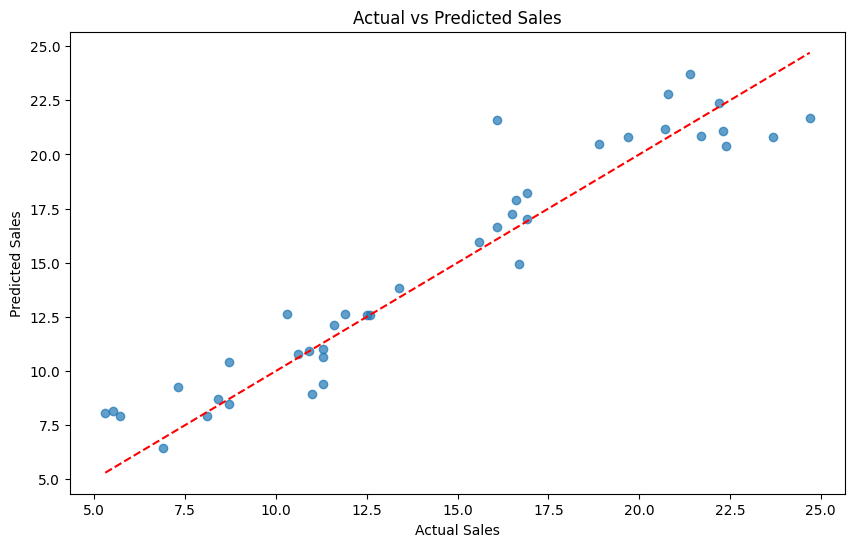

In [12]:
# Predicted vs Actual Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.show()

# Conclusion

In conclusion, the analysis and modeling of sales prediction using machine learning in Python have provided valuable insights into the relationship between advertising expenditures and sales.

1. **Data Understanding**: The dataset contains information about advertising expenditure on TV, Radio, and Newspaper, along with corresponding sales figures. This dataset has been explored using descriptive statistics and visualizations to understand the distribution and relationships between variables.

2. **Model Building and Evaluation**: A linear regression model was built to predict sales based on advertising expenditures. The model performed well, with a Mean Squared Error (MSE) of approximately 2.91 and an R-squared value of 0.906. These metrics indicate that the model explains around 90.6% of the variance in sales, suggesting a good fit to the data.

3. **Key Findings**:
   - Advertising expenditures on TV have a relatively large spread, with a mean of approximately 147.04 and a standard deviation of approximately 85.85.
   - The linear regression model suggests a positive relationship between advertising expenditures and sales, with higher expenditures leading to higher sales, on average.

4. **Implications**:
   - Businesses can use these insights to optimize their advertising strategies, focusing more on channels that have a greater impact on sales.
   - Data scientists and analysts can further refine the model by incorporating additional features or using more advanced machine learning techniques to improve prediction accuracy.

Overall, the analysis demonstrates the importance of data-driven approaches in understanding and predicting sales, which can help businesses make informed decisions and drive growth.